In [1]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-rfr8wys0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-rfr8wys0
  Resolved https://github.com/huggingface/transformers to commit 8cb96787a6bd87f43ff651b8ac40974c1fe75a7c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 9.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 7.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for transformers: filename=transformers-4.53.0.dev0-py3-none-any.whl size=11382826 sha256=0a52fae9939d70401f90f3b7fce5999c162a6a2f1929a3b0303429f8acb522ac
  Stored in directory: /tmp/pip-ephem-

In [2]:
!pip install jupyterlab ipywidgets bertviz xformers evaluate matplotlib

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 9.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 MB 9.5 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 9.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 6.3 MB/s

# Tokenizers

In [4]:
from transformers import BertModel, BertTokenizer

# BertModel - це модель. гарний для візуалізації
# BertTokenizer - токенізатор, розбиває текст на частини (токени), зрозумілі моделі машинного навчання.
modelName = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(modelName)

model = BertModel.from_pretrained(modelName)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
# tokenized = tokenizer("I read a good novel.")
tokenized = tokenizer("Good morning Oleksandr!")
# Токенізація - це не тільки "розбити слова", а розбити → перетворити на токени → токени → у числа.
print(tokenized)

{'input_ids': [101, 2204, 2851, 15589, 5705, 5685, 2099, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [14]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
print(tokens)

['[CLS]', 'good', 'morning', 'ole', '##ks', '##and', '##r', '!', '[SEP]']


# Positional Encoding

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Позиційне кодування потрібно, щоб трансформер розумів порядок слів. Усі слова обробляються паралельно, і без позиційної інформації модель не дізнається, де яке слово стояло.

# Кодування робиться за допомогою синусів та косінусів - вони створюють унікальний "відбиток" позиції кожного токена.

# Формула береться з наукової статті (в оригінальній статті з трансформерів - Attention is All You Need).

def encode_positions(num_tokens, depth, n=10000):
    # num_tokens - скільки токенів
    # depth - скільки чисел вектора ми використовуватимемо для кодування однієї позиції. Половина значень буде через sin, інша половина через cos.
    # n - це велике число, яке впливає на те, як сильно відрізняється позиційне кодування між токенами.
    # Якщо n більше: хвилі змінюються повільно – довгі, плавні коливання.
    # Якщо n менше: хвилі міняються швидко — короткі, часті коливання.

    positionalMatrix = np.zeros((num_tokens, depth))
    # Створюємо матрицю з нулів розміром [num_tokens, depth]. У ній зберігатимемо синуси та косинуси.
    for row in range(num_tokens):  # за токенами (по рядках).
        for col in np.arange(
                int(depth / 2)):  # по половині стовпців (бо чергуватимемо: парні індекси — sin, непарні — cos).
            denominator = np.power(n, 2 * col / depth)
            # Чим більше col, тим менше частота коливання синуса/косинусу - вони змінюються "повільніше" для старших компонентів.
            positionalMatrix[row, 2 * col] = np.sin(row / denominator)  # парні індекси: sin
            positionalMatrix[row, 2 * col + 1] = np.cos(row / denominator)  # непарні: cos
    return positionalMatrix  # Повертаємо матрицю розміром [num_tokens, depth], у якій кожен рядок - це позиційне кодування токена.

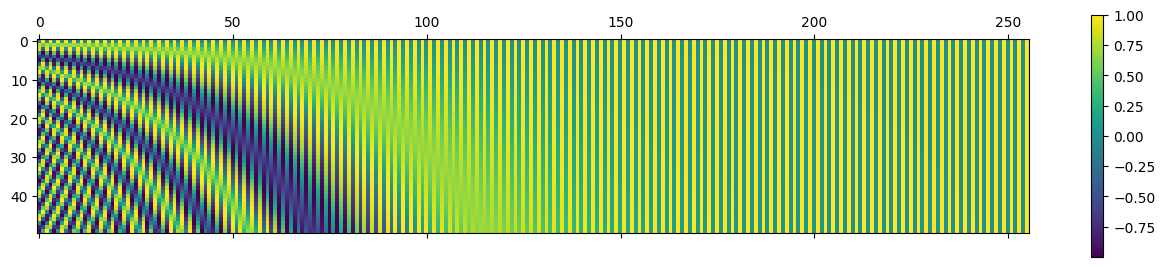

In [16]:
positionalMatrix = encode_positions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

# Self-Attention

In [19]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

tokenizer_viz = BertTokenizer.from_pretrained(modelName)
model_viz = BertModel.from_pretrained(modelName)  # модель, яка дає attention-зв'язки.

In [22]:
show(model_viz, "bert", tokenizer_viz, "I read a good novel", display_mode="light", head=11)
# Head - це частина attention-механізму. Кожна голова має свої "погляди" на зв'язку між словами. Тому іноді потрібно дивитися на кілька голів — кожна може бачити різне.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Also play with https://huggingface.co/spaces/exbert-project/exbert

# GPT2 model (137M parameters)

In [ ]:
from transformers import pipeline

generator = pipeline('text-generation', model='gpt2')
generator("I read a good novel.", max_length=30, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. Now, I may as well say that my novel is no longer a novel. Even when I was published in 1883'},
 {'generated_text': 'I read a good novel. In this novel, a woman named Anna is hired at a convenience store by an old man. She takes Anna up on'},
 {'generated_text': "I read a good novel. It's about the events of a certain period. I was a young boy in the mid-eighties when I read"},
 {'generated_text': "I read a good novel.\n\nI read, as it should be done, a good book. I want to read novels. I don't"},
 {'generated_text': "I read a good novel. The book is called The Man in Black. There's a book called In a World of Words. It was a fascinating"}]

In [ ]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "This movie seemed really long. I didn't like making it longer than it was supposed to, so I just left it up to the editors who really worked through.\n\nI was in Detroit about a year ago, and my sister came out in December and saw this video for the movie.\n\nI just want to say thank you to the wonderful editor of this, Mike Reitz. He's been one of my absolute best friends during those four years, and when I think back on it later on, I wish that he would have used a different camera that we used when we did this one to the movie, because it was more of a story. But I'll admit it. We took a lot of inspiration from his work.\n\nWe went to Detroit after the disaster but it also was like a big family reunion.\n\nIt was one of those things where I was so happy to be back, and I mean I really didn't want to be.\n\nThe only surprise it really added to the movie was the fact that it didn't seem to make any money.\n\nIt wasn't. We did take a little bit more. It was just a 

In [ ]:
generator("Star Trek", max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Star Trek")\n\nStar Trek Volume 10: New World (writer: "The Day the Earth Stood Still")\n\nStar Trek Volume 7: Unfortunate Son (writer: "The Day The Earth Stood Still")\n\n\n(performer: "The Day the Earth Stood Still"), as part of a special retrospective at the 2014 Los Angeles Film Festival on October 23, 2013 (TV Series)\n\n\n(writer: "The Day the Earth Stood Still"), as part'},
 {'generated_text': 'Star Trek: Generations – The Next Generation DVD / Blu-ray Combo Pack (4.49 / 7.6) Star Trek: Generations – The Next Generation Blu-ray Combo Pack (4.49 / 7.6) (English) Original Video (4.35 / 8.2)\n\nStar Trek: Voyager Blu-ray (English) Original Video (4.34 / 9.3) Star Trek: Voyage to Space (English) Original Video (3.94 /'},
 {'generated_text': 'Star Trek: Deep Space Nine\n\nAboard Voyager - The Voyager Conspiracy\n\nAn early draft of Voyager story "Reunion". (Aboard Voyager - Deep Space Nine; Star Trek: Deep Space Nine Star Trek II: The Wrath of Khan) The Voyager C

# GPT2-Large model (812M parameters)

In [ ]:
generator = pipeline('text-generation', model='gpt2-large')
generator("I read a good novel.", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. I have seen a good TV series. But I have read a lot of books about politics. And none are better or'},
 {'generated_text': "I read a good novel. It's a collection of short stories. They're very difficult. It's a tough story, a tough genre. I"},
 {'generated_text': 'I read a good novel. I\'ve played a few games and I\'m excited about the future. I also read this book and a book called "'},
 {'generated_text': 'I read a good novel. Now imagine you\'re reading a good novel:\n\n"Sister!"\n\n"Is the boy\'s name?"'},
 {'generated_text': 'I read a good novel. I have been to a great university and one of the top two, or three, in the world. I have a'}]

## Fine-Tuning GPT2

In [ ]:
!wget https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py

--2023-07-28 18:25:04--  https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27521 (27K) [text/plain]
Saving to: ‘run_clm.py’

run_clm.py          100%[===================>]  26.88K  --.-KB/s    in 0s      

2023-07-28 18:25:04 (103 MB/s) - ‘run_clm.py’ saved [27521/27521]



In [ ]:
!pip install transformers[torch]

In [ ]:
%%bash

python run_clm.py \
    --model_name_or_path gpt2 \
    --dataset_name imdb \
    --per_device_train_batch_size 8 \
    --per_device_eval_batch_size 8 \
    --do_train \
    --do_eval \
    --output_dir /tmp/test-clm

07/28/2023 18:44:19 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
07/28/2023 18:44:19 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_

2023-07-28 18:44:17.269873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/datasets/load.py:2069: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=None' instead.
  warnings.warn(
No config specified, defaulting to the single config: imdb/plain_text
Loading Dataset Infos from /root/.cache/huggingface/modules/datasets_modules/datasets/imdb/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0
Overwrite dataset info from restored data version if exists.
Loading Dataset info from /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0
Found cached dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)
Loading Dataset info from /root/.cach

In [ ]:
from transformers import pipeline
from transformers import GPT2Tokenizer, GPT2LMHeadModel

dir = "/tmp/test-clm"
generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained(dir),
                     tokenizer=GPT2Tokenizer.from_pretrained(dir))
generator("I read a good novel.", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. I am very interested in it as well as reading it.<br /><br />There are a lot of funny scenes'},
 {'generated_text': "I read a good novel. But that's not how they make it. The original was about something I didn't remember but is always remembered by."},
 {'generated_text': "I read a good novel.The book isn't just a mystery - the cast and story has it all.I'll be honest, while I think"},
 {'generated_text': "I read a good novel. Some of the situations don't bother me really, but they make the film better than a good novel or movie. I"},
 {'generated_text': "I read a good novel. Well, I think this was the last novel I read of my life! I've read a lot of great books,"}]

In [ ]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'This movie seemed really long. We had two stars. I really thought that\'s what the filmmakers would get from it! <br /><br />I didn\'t agree with the fact that the movie was too fast paced and had too much action, the movie just didn\'t have anything exciting at all.<br /><br />And it just seemed like an empty and boring movie! One actor plays the main villain and the rest just play their roles. And the villain doesn\'t quite stand out as much as the villain did. And that really hurt my enjoyment of the movie.<br /><br />I think this movie is really bad. Too simple and just didn\'t have any exciting action, and some very boring dialogs. It didn\'t make any sense to me. And that really hurt my enjoyment of the movie<br /><br />It was so dull and boring that I wanted to give up watching it. The movie was bad, so I could not believe I was watching something so boring and dull. And that made it seem that you just bought into the bad movie and didn\'t care what happened

In [ ]:
generator("Star Trek", max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Star Trek: The Next Generation - one of the better original series, had its fair share of problems. The episode where Tuvok says that all life is fleeting, and that everyone should go extinct, is a major one. This episode is the worst installment in the Star Trek franchise, it shows what an absolute horrible thing that is about Star Trek. If you don\'t understand the concept before watching, I suggest you read this piece from "The New Yorker", this does not tell the stories,'},
 {'generated_text': 'Star Trek: Deep Space Nine" just isn\'t quite right for an 8-year-old. The plot and costumes are just plain lame, and the dialogue is ridiculous -- especially the one between Spock and "Titanic." What a waste of valuable time. Unfortunately my friends and I spent an hour with the production of the show in the very early 90\'s, so it has been a long time since we have seen a series of similar movies (and only now in the \'70\'s).'},
 {'generated_text': "Star Trek Series -